In [23]:
!hdfs dfs -ls /user/efischbein/data/group_project/hospital

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 2 items
-rw-r--r--   3 qiongli2 efischbein    2631315 2022-02-27 15:17 /user/efischbein/data/group_project/hospital/Hospital_General_Information.csv
-rw-r--r--   3 qiongli2 efischbein    3665709 2022-02-27 15:15 /user/efischbein/data/group_project/hospital/hospitals.csv


In [12]:
!hdfs dfs -mkdir /user/efischbein/data/group_project/hospital

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0


In [19]:
!hdfs dfs -ls /user/efischbein/data/group_project/hospital



Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 1 items
-rw-r--r--   3 qiongli2 efischbein    3665709 2022-02-27 15:15 /user/efischbein/data/group_project/hospital/hospitals.csv


In [18]:
!hdfs dfs -put /home/qiongli2/data/hospitals.csv /user/efischbein/data/group_project/hospital


Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0


In [129]:
!hdfs dfs -put /home/qiongli2/data/crime_data_w_population_and_crime_rate.csv /user/efischbein/data/group_project/

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0


In [20]:
!hdfs dfs -put /home/qiongli2/data/Hospital_General_Information.csv /user/efischbein/data/group_project/hospital



Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0


### 1. Build Connection 

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spark = SparkSession.builder.appName('HouseSales').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '4g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','4g')])

#print spark configuration settings
spark.sparkContext.getConf().getAll()

[('spark.eventLog.enabled', 'true'),
 ('spark.yarn.jars',
  'local:/opt/cloudera/parcels/CDH-6.3.0-1.cdh6.3.0.p0.1279813/lib/spark/jars/*,local:/opt/cloudera/parcels/CDH-6.3.0-1.cdh6.3.0.p0.1279813/lib/spark/hive/*'),
 ('spark.yarn.appMasterEnv.MKL_NUM_THREADS', '1'),
 ('spark.sql.queryExecutionListeners',
  'com.cloudera.spark.lineage.NavigatorQueryListener'),
 ('spark.lineage.log.dir', '/var/log/spark/lineage'),
 ('spark.org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter.param.PROXY_HOSTS',
  'md01.rcc.local,md02.rcc.local'),
 ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
 ('spark.executorEnv.PYTHONPATH',
  '/opt/cloudera/parcels/CDH/lib/spark/python/lib/py4j-0.10.7-src.zip:/opt/cloudera/parcels/CDH/lib/spark/python/lib/pyspark.zip<CPS>/opt/cloudera/parcels/CDH-6.3.0-1.cdh6.3.0.p0.1279813/lib/spark/python/lib/py4j-0.10.7-src.zip<CPS>/opt/cloudera/parcels/CDH-6.3.0-1.cdh6.3.0.p0.1279813/lib/spark/python/lib/pyspark.zip'),
 ('spark.yarn.historyServer.addre

In [135]:
!hdfs dfs -ls /user/efischbein/data/group_project/zillow_econ/CountyCrossWalk_Zillow.csv

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 9 items
-rwxrwxrwx   3 efischbein efischbein  689627012 2022-02-07 18:31 /user/efischbein/data/group_project/zillow_econ/City_time_series.csv
-rwxrwxrwx   3 efischbein efischbein     232467 2022-02-07 18:32 /user/efischbein/data/group_project/zillow_econ/CountyCrossWalk_Zillow.csv
-rwxrwxrwx   3 efischbein efischbein  112778579 2022-02-07 18:31 /user/efischbein/data/group_project/zillow_econ/County_time_series.csv
-rwxrwxrwx   3 efischbein efischbein       4668 2022-02-07 18:32 /user/efischbein/data/group_project/zillow_econ/DataDictionary.csv
-rwxrwxrwx   3 efischbein efischbein   56232114 2022-02-07 18:31 /user/efischbein/data/group_project/zillow_econ/Metro_time_series.csv
-rwxrwxrwx   3 efischbein efischbein  265790699 2022-02-07 18:32 /user/efischbein/data/group_project/zillow_econ/Neighborhood_time_series.csv
-rwxrwxrwx   3 efischbein efischbein    4742679 2022-02-07 18:3

### 2 Preprocess Data

In [7]:
import pandas as pd

In [8]:
dat = spark.read.csv('/user/efischbein/data/group_project/us_housing_prices', header = True)

In [9]:
hospital_ratings= spark.read.csv('/user/efischbein/data/group_project/hospital/Hospital_General_Information.csv', header = True)

In [10]:
hospital = spark.read.csv('/user/efischbein/data/group_project/hospital/hospitals.csv', header = True)

In [189]:
crime = spark.read.csv('/user/efischbein/data/group_project/crime_data_w_population_and_crime_rate.csv',header = True)

In [12]:
CountyCrossWalk_Zillow = spark.read.csv('/user/efischbein/data/group_project/zillow_econ/CountyCrossWalk_Zillow.csv',header = True)

In [13]:
dat.show()

+-----+-----+--------------------+--------+-----------+-----------+--------------------+--------------------+----------+-----------+----------+---------+----------+--------------------+----+----+
|state| zip5|    physical_address|    city|     county|property_id|           sale_date|       property_type|sale_price|seller_name|buyer_name|num_units|year_built|          source_url|book|page|
+-----+-----+--------------------+--------+-----------+-----------+--------------------+--------------------+----------+-----------+----------+---------+----------+--------------------+----+----+
|   CA|92220|   1050 THOMPSON AVE| BANNING|  RIVERSIDE|  408144009|1988-05-25 00:00:...|SINGLE FAMILY DWE...|         0|       null|      null|        1|      1965|https://ca-rivers...|null|null|
|   CA|92220|   1050 THOMPSON AVE| BANNING|  RIVERSIDE|  408144009|1989-03-17 00:00:...|SINGLE FAMILY DWE...|         0|       null|      null|        1|      1965|https://ca-rivers...|null|null|
|   CA|92220|   1050

In [8]:
dat.printSchema()

root
 |-- state: string (nullable = true)
 |-- zip5: string (nullable = true)
 |-- physical_address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- county: string (nullable = true)
 |-- property_id: string (nullable = true)
 |-- sale_date: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- sale_price: string (nullable = true)
 |-- seller_name: string (nullable = true)
 |-- buyer_name: string (nullable = true)
 |-- num_units: string (nullable = true)
 |-- year_built: string (nullable = true)
 |-- source_url: string (nullable = true)
 |-- book: string (nullable = true)
 |-- page: string (nullable = true)



In [9]:
dat.describe().show()

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|               state|                zip5|    physical_address|                city|              county|property_id|        sale_date|       property_type|       sale_price|         seller_name|          buyer_name|           num_units|          year_built|          source_url|                book|                page|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  coun

#### Hospital Preprocessing

In [14]:
hospital_ratings = hospital_ratings.select('Hospital Name', 'Hospital overall rating')

In [15]:

hospital_ratings.dropna()
hospital_ratings.printSchema()

root
 |-- Hospital Name: string (nullable = true)
 |-- Hospital overall rating: string (nullable = true)



In [16]:
hospital_ratings.select('Hospital overall rating').distinct().show()

+-----------------------+
|Hospital overall rating|
+-----------------------+
|                      3|
|                      5|
|                      1|
|                      4|
|          Not Available|
|                      2|
+-----------------------+



In [17]:
hospital_ratings.groupBy('Hospital overall rating').count().show()

+-----------------------+-----+
|Hospital overall rating|count|
+-----------------------+-----+
|                      3| 1761|
|                      5|   82|
|                      1|  107|
|                      4|  939|
|          Not Available| 1245|
|                      2|  678|
+-----------------------+-----+



In [18]:
hospital_ratings = hospital_ratings.where(hospital_ratings['Hospital overall rating'] != 'Not Available')

In [19]:
hospital_ratings.groupBy('Hospital overall rating').count().show()

+-----------------------+-----+
|Hospital overall rating|count|
+-----------------------+-----+
|                      3| 1761|
|                      5|   82|
|                      1|  107|
|                      4|  939|
|                      2|  678|
+-----------------------+-----+



In [ ]:
#fillna need the same data type, if it is string and fill integer 0 will be wrong.  have to fill '0'

In [20]:
#RENAME THE COLUMN FOR JOIN 
hospital = hospital.withColumn('Hospital Name',hospital.NAME)
       

In [21]:
hospitals_with_ratings =hospital.join(hospital_ratings,['Hospital Name'],'left').na.fill('0',subset = ['Hospital overall rating'])


In [47]:
hospitals_with_ratings.groupBy('TYPE').count().orderBy('count',ascending = [0]).show()

+------------------+-----+
|              TYPE|count|
+------------------+-----+
|GENERAL ACUTE CARE| 4868|
|   CRITICAL ACCESS| 1143|
|       PSYCHIATRIC|  743|
|    LONG TERM CARE|  431|
|    REHABILITATION|  365|
|          MILITARY|  218|
|          CHILDREN|  127|
|           SPECIAL|  122|
|             WOMEN|   19|
|   CHRONIC DISEASE|    9|
+------------------+-----+



In [48]:
hospitals_with_ratings.groupBy('OWNER').count().orderBy('count',ascending = [0]).show()

+--------------------+-----+
|               OWNER|count|
+--------------------+-----+
|          NON-PROFIT| 3820|
|         PROPRIETARY| 2140|
|GOVERNMENT - DIST...|  590|
|  GOVERNMENT - LOCAL|  552|
|       NOT AVAILABLE|  385|
|  GOVERNMENT - STATE|  295|
|GOVERNMENT - FEDERAL|  261|
|      REHABILITATION|    1|
|                null|    1|
+--------------------+-----+



In [51]:
hospitals_with_ratings.groupBy('STATUS').count().orderBy('count',ascending = [0]).show()

+------+-----+
|STATUS|count|
+------+-----+
|  OPEN| 7671|
|CLOSED|  374|
+------+-----+



In [49]:
dat.groupBy('county').count().orderBy('count',ascending = [0]).show()

+-------------------+-------+
|             county|  count|
+-------------------+-------+
|          RIVERSIDE|5097590|
|        LOS ANGELES|4137292|
|               null|2841857|
|            Volusia|2700287|
|        POLK COUNTY|2214934|
|        KING COUNTY|2056066|
|HILLSBOROUGH COUNTY|2040200|
|        COOK COUNTY|1880067|
|    PINELLAS COUNTY|1474337|
|            BREVARD|1413255|
|             HARRIS|1405041|
|       PASCO COUNTY|1295988|
|       PHILADELPHIA|1118751|
|           HARTFORD| 914778|
|    OKLAHOMA COUNTY| 873409|
|         MIAMI-DADE| 850622|
|          MIDDLESEX| 785874|
|              ESSEX| 737635|
|         PALM BEACH| 602158|
|       ADAMS COUNTY| 600713|
+-------------------+-------+
only showing top 20 rows



In [57]:
hospitals_with_ratings.groupBy(['ZIP', 'CITY','STATE','COUNTY','TYPE','Hospital overall rating','OWNER','STATUS']).count().orderBy('count',ascending = [0]).show()

+-----+------------+-----+---------+------------------+-----------------------+--------------------+------+-----+
|  ZIP|        CITY|STATE|   COUNTY|              TYPE|Hospital overall rating|               OWNER|STATUS|count|
+-----+------------+-----+---------+------------------+-----------------------+--------------------+------+-----+
|46947|  LOGANSPORT|   IN|     CASS|GENERAL ACUTE CARE|                      3|  GOVERNMENT - LOCAL|  OPEN|    7|
|62226|  BELLEVILLE|   IL|ST. CLAIR|GENERAL ACUTE CARE|                      3|          NON-PROFIT|  OPEN|    7|
|79360|    SEMINOLE|   TX|   GAINES|   CRITICAL ACCESS|                      3|GOVERNMENT - DIST...|  OPEN|    7|
| 3860|NORTH CONWAY|   NH|  CARROLL|GENERAL ACUTE CARE|                      3|  GOVERNMENT - LOCAL|  OPEN|    7|
|62233|     CHESTER|   IL| RANDOLPH|   CRITICAL ACCESS|                      3|       NOT AVAILABLE|  OPEN|    7|
|74960|    STILWELL|   OK|    ADAIR|GENERAL ACUTE CARE|                      3|         

In [98]:
hospital_final = hospitals_with_ratings.groupBy(['ZIP', 'CITY','STATE','COUNTY','TYPE','Hospital overall rating','OWNER','STATUS']).count().orderBy('count',ascending = [0])

In [147]:
hos1 = hospital_final.groupBy('ZIP').agg(F.sum('count'),F.avg('Hospital overall rating')).orderBy('sum(count)', ascending = [0])

In [148]:
hos2 = hospital_final.groupBy('ZIP').pivot('TYPE').agg(F.sum('count').alias("CNT")
                                                    ,F.avg('Hospital overall rating').alias('RATE'))

hos2 = hos2.na.fill(0)
hos3 = hospital_final.groupBy('ZIP').pivot('OWNER').agg(F.sum('count').alias("CNT")
                                                    ,F.avg('Hospital overall rating').alias('RATE'))


hos3 = hos3.na.fill(0)

In [149]:
hos3 = hos3.drop('REHABILITATION_CNT','REHABILITATION_RATE')

In [150]:
#b.groupBy("Add").pivot("Name").sum("ID").show()
#hos3 = hospital_final.groupBy('ZIP').pivot('TYPE').avg('Hospital overall rating').na.fill(0)
#hos4 = hospital_final.groupBy('ZIP').pivot('TYPE').sum('count').alias("CNT").na.fill(0)
#hos5 = hospital_final.groupBy('ZIP').pivot('OWNER').avg('Hospital overall rating').na.fill(0)
#hos6 = hospital_final.groupBy('ZIP').pivot('OWNER').sum('count').na.fill(0)

In [151]:
#hospitals_with_ratings =hospital.join(hospital_ratings,['Hospital Name'],'left').na.fill('0',subset = ['Hospital overall rating'])
hos1 = hos1.join(hos2,['ZIP'], 'left')
hos1 = hos1.join(hos3,['ZIP'], 'left')


In [152]:
print((hos1.count(), len(hos1.columns)))

(5615, 39)


In [153]:
hos1  = hos1.withColumn('ZIP5', hos1.ZIP).drop('ZIP')

In [154]:
hos1 = hos1.drop('null','NOT AVAILABLE')

In [155]:
hos1.printSchema()

root
 |-- sum(count): long (nullable = true)
 |-- avg(Hospital overall rating): double (nullable = true)
 |-- CHILDREN_CNT: long (nullable = true)
 |-- CHILDREN_RATE: double (nullable = true)
 |-- CHRONIC DISEASE_CNT: long (nullable = true)
 |-- CHRONIC DISEASE_RATE: double (nullable = true)
 |-- CRITICAL ACCESS_CNT: long (nullable = true)
 |-- CRITICAL ACCESS_RATE: double (nullable = true)
 |-- GENERAL ACUTE CARE_CNT: long (nullable = true)
 |-- GENERAL ACUTE CARE_RATE: double (nullable = true)
 |-- LONG TERM CARE_CNT: long (nullable = true)
 |-- LONG TERM CARE_RATE: double (nullable = true)
 |-- MILITARY_CNT: long (nullable = true)
 |-- MILITARY_RATE: double (nullable = true)
 |-- PSYCHIATRIC_CNT: long (nullable = true)
 |-- PSYCHIATRIC_RATE: double (nullable = true)
 |-- REHABILITATION_CNT: long (nullable = true)
 |-- REHABILITATION_RATE: double (nullable = true)
 |-- SPECIAL_CNT: long (nullable = true)
 |-- SPECIAL_RATE: double (nullable = true)
 |-- WOMEN_CNT: long (nullable = tru

In [156]:
### Join dat

In [157]:
dat = dat.join(hos1, 'ZIP5','left').na.fill(0)

In [158]:
print((dat.count(), len(dat.columns)))

(51328085, 54)


#### Exploration 

In [45]:
hospitals_with_ratings.select('zip4').filter("zip4 not like '%NOT AVAILABLE%'").show(10)

+----+
|zip4|
+----+
|1914|
|4470|
|1899|
|2999|
|4069|
|2088|
|9070|
|2010|
|1890|
|3198|
+----+
only showing top 10 rows



In [101]:
hospitals_with_ratings.groupBy('Hospital overall rating').count().show()

+-----------------------+-----+
|Hospital overall rating|count|
+-----------------------+-----+
|                      3| 1485|
|                      0| 4995|
|                      5|   67|
|                      1|   90|
|                      4|  822|
|                      2|  586|
+-----------------------+-----+



In [24]:
#change the data type 

hospitals_with_ratings = hospitals_with_ratings.withColumn('Hospital overall rating', hospitals_with_ratings['Hospital overall rating'].cast('int'))

In [25]:
subset_hos1 = hospitals_with_ratings.select('STATE').groupBy('STATE').count().orderBy('count',ascending = [0])

In [28]:
subset_hos2 = hospitals_with_ratings.select('STATE','Hospital overall rating').dropna()

In [29]:
subset_hos2.printSchema()

root
 |-- STATE: string (nullable = true)
 |-- Hospital overall rating: integer (nullable = true)



In [30]:
hospitals_with_ratings.groupBy('STATE').agg(F.avg('Hospital overall rating')).show()

+-----+----------------------------+
|STATE|avg(Hospital overall rating)|
+-----+----------------------------+
|   SC|           1.146788990825688|
|   AZ|          0.7692307692307693|
|   LA|          0.7453183520599251|
|   MN|          1.3121019108280254|
|   NJ|          0.7402597402597403|
|   DC|                      0.5625|
|   OR|          1.9523809523809523|
|   VA|          1.2027972027972027|
|   RI|                        1.55|
|   WY|                        1.25|
|   KY|           1.492537313432836|
|   NH|          2.4150943396226414|
|   MI|                    1.671875|
|   NV|          0.6842105263157895|
|   WI|          0.6608187134502924|
|   ID|          0.7090909090909091|
|   CA|          0.8353765323992994|
|   NE|          1.7762237762237763|
|   CT|          1.6829268292682926|
|   MT|          0.7714285714285715|
+-----+----------------------------+
only showing top 20 rows



In [31]:
subset_hos2 = hospitals_with_ratings.groupBy('STATE').agg(F.avg('Hospital overall rating')).orderBy('avg(Hospital overall rating)',ascending =[0])

In [32]:
psubset_hos1 = subset_hos1.toPandas()

In [33]:
psubset_hos2 = subset_hos2.toPandas()

In [34]:
psubset_hos1.head()

,STATE,count
0,TX,848
1,CA,571
2,FL,370
3,OH,340
4,NY,290


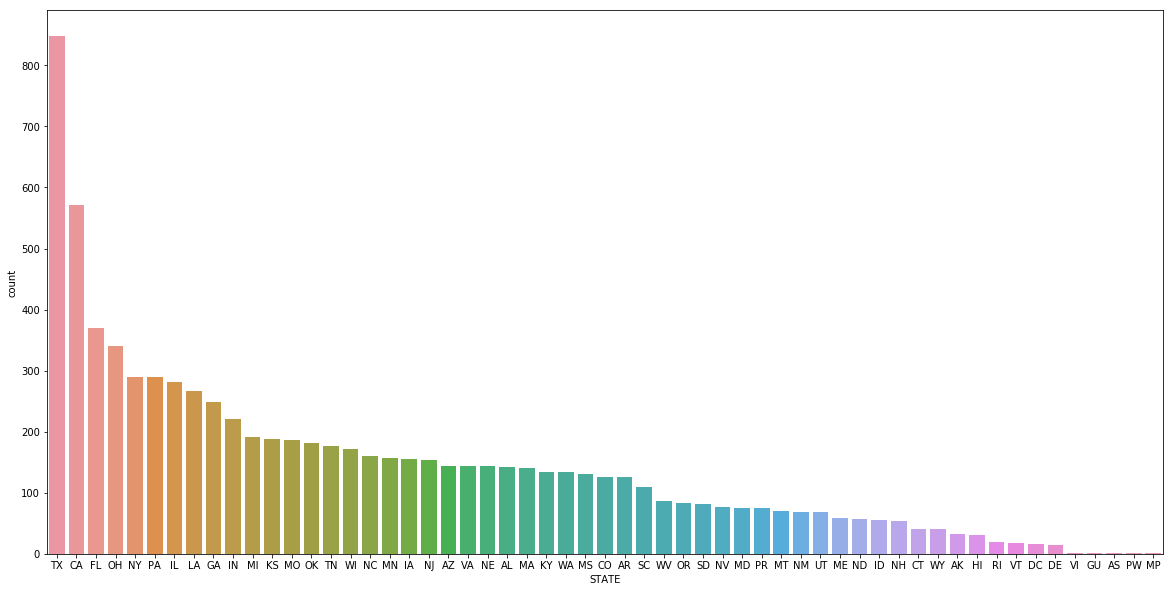

In [35]:
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="STATE", y="count", data=psubset_hos1)

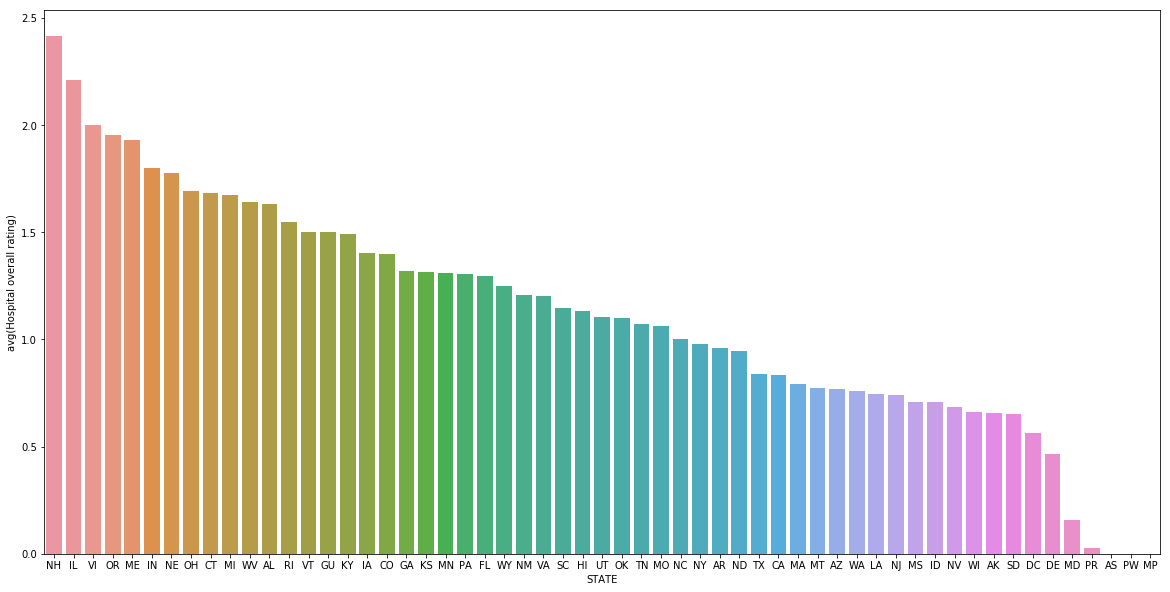

In [36]:
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="STATE", y="avg(Hospital overall rating)", data=psubset_hos2)

In [ ]:
### hospital level could be 'county','zipcode','state'

In [ ]:
CountyCrossWalk_Zillow

### Crime Exploration

In [190]:
crime.show()

+--------------------+---------------------+------+-------+----+----+--------+--------+--------+------+-------+-------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+--------+
|         county_name|crime_rate_per_100000|index2|EDITION|PART|IDNO|CPOPARST|CPOPCRIM|AG_ARRST|AG_OFF| COVIND|INDEX11|MODINDX|MURDER|RAPE|ROBBERY|AGASSLT|BURGLRY|LARCENY|MVTHEFT|ARSON|population|FIPS_ST|FIPS_CTY|
+--------------------+---------------------+------+-------+----+----+--------+--------+--------+------+-------+-------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+--------+
|  St. Louis city, MO|          1791.995377|     1|      1|   4|1612|  318667|  318667|      15|    15|    100|   5706|  22329|   119| 200|   1778|   3609|   4995|  13791|   3543|  464|    318416|     29|     510|
|Crittenden County...|          1754.914968|     2|      1|   4| 130|   50717|   50717|       4|     4|    100|    873|   3424|     8|  38|    1

In [205]:
state = crime.withColumn('ColCommasRemoved',F.split(crime.county_name,',')).select('county_name',F.rtrim(F.col('ColCommasRemoved')[1]))


In [206]:
state = state.withColumn('state',state['rtrim(ColCommasRemoved[1])']).drop('rtrim(ColCommasRemoved[1])')

In [209]:
state.show()
crime = crime.join(state, 'county_name','left')

+--------------------+-----+
|         county_name|state|
+--------------------+-----+
|  St. Louis city, MO|   MO|
|Crittenden County...|   AR|
|Alexander County, IL|   IL|
|   Kenedy County, TX|   TX|
|  De Soto Parish, LA|   LA|
|  Baltimore city, MD|   MD|
|   Shelby County, TN|   TN|
| Marlboro County, SC|   SC|
|   Storey County, NV|   NV|
|District of Colum...|   DC|
|   Dillon County, SC|   SC|
|    Scott County, MO|   MO|
|Philadelphia Coun...|   PA|
| Pershing County, NV|   NV|
|Greenwood County, SC|   SC|
|  Madison County, TN|   TN|
| Davidson County, TN|   TN|
|   Marion County, IN|   IN|
|    Wayne County, MI|   MI|
|  Jackson County, MO|   MO|
+--------------------+-----+
only showing top 20 rows



In [211]:
crime.show()

+--------------------+---------------------+------+-------+----+----+--------+--------+--------+------+-------+-------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+--------+-----+
|         county_name|crime_rate_per_100000|index2|EDITION|PART|IDNO|CPOPARST|CPOPCRIM|AG_ARRST|AG_OFF| COVIND|INDEX11|MODINDX|MURDER|RAPE|ROBBERY|AGASSLT|BURGLRY|LARCENY|MVTHEFT|ARSON|population|FIPS_ST|FIPS_CTY|state|
+--------------------+---------------------+------+-------+----+----+--------+--------+--------+------+-------+-------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+--------+-----+
|  St. Louis city, MO|          1791.995377|     1|      1|   4|1612|  318667|  318667|      15|    15|    100|   5706|  22329|   119| 200|   1778|   3609|   4995|  13791|   3543|  464|    318416|     29|     510|   MO|
|Crittenden County...|          1754.914968|     2|      1|   4| 130|   50717|   50717|       4|     4|    100|    873| 

In [168]:
#Crime_rates["FIPS"] = Crime_rates["FIPS"].astype("int64")

In [166]:
subset_crime = crime.groupBy(['county_name','crime_rate_per_100000']).agg(F.avg('crime_rate_per_100000')).orderBy('avg(crime_rate_per_100000)',ascending = [0])

In [169]:
psubset_crime = subset_crime.toPandas()

In [144]:
crime.groupBy('FIPS_ST','FIPS_CTY').count().orderBy('count',ascending = [0]).show()

+-------+--------+-----+
|FIPS_ST|FIPS_CTY|count|
+-------+--------+-----+
|     20|      29|    1|
|      1|      41|    1|
|     37|      45|    1|
|      2|     100|    1|
|     18|     159|    1|
|     30|      87|    1|
|     56|      33|    1|
|     55|      41|    1|
|     31|       3|    1|
|     49|      17|    1|
|     41|      31|    1|
|     29|      95|    1|
|      5|     139|    1|
|     26|     153|    1|
|     45|      35|    1|
|     30|      95|    1|
|     54|      19|    1|
|     20|     181|    1|
|     49|      33|    1|
|     29|      65|    1|
+-------+--------+-----+
only showing top 20 rows



In [161]:
CountyCrossWalk_Zillow = CountyCrossWalk_Zillow.withColumn('FIPS_ST',CountyCrossWalk_Zillow['StateFIPS'])\
                                                .withColumn('FIPS_CTY',CountyCrossWalk_Zillow['CountyFIPS'])

In [162]:
CountyCrossWalk_Zillow.printSchema()

root
 |-- CountyName: string (nullable = true)
 |-- StateName: string (nullable = true)
 |-- StateFIPS: string (nullable = true)
 |-- CountyFIPS: string (nullable = true)
 |-- MetroName_Zillow: string (nullable = true)
 |-- CBSAName: string (nullable = true)
 |-- CountyRegionID_Zillow: string (nullable = true)
 |-- MetroRegionID_Zillow: string (nullable = true)
 |-- FIPS: string (nullable = true)
 |-- CBSACode: string (nullable = true)
 |-- FIPS_ST: string (nullable = true)
 |-- FIPS_CTY: string (nullable = true)



In [227]:
crime.filter("upper(county) like 'HANCOCK'").show()

+-----+---------------------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+
|state|crime_rate_per_100000|MODINDX|MURDER|RAPE|ROBBERY|AGASSLT|BURGLRY|LARCENY|MVTHEFT|ARSON|population| county|
+-----+---------------------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+
|   GA|          78.83770695|    120|     0|   0|      2|      5|     42|     70|      8|    0|      8879|HANCOCK|
+-----+---------------------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+-------+



In [212]:
crime = crime.join(CountyCrossWalk_Zillow,['FIPS_ST','FIPS_CTY'],'left')


In [213]:
crime.printSchema()

root
 |-- FIPS_ST: string (nullable = true)
 |-- FIPS_CTY: string (nullable = true)
 |-- county_name: string (nullable = true)
 |-- crime_rate_per_100000: string (nullable = true)
 |-- index2: string (nullable = true)
 |-- EDITION: string (nullable = true)
 |-- PART: string (nullable = true)
 |-- IDNO: string (nullable = true)
 |-- CPOPARST: string (nullable = true)
 |-- CPOPCRIM: string (nullable = true)
 |-- AG_ARRST: string (nullable = true)
 |-- AG_OFF: string (nullable = true)
 |-- COVIND: string (nullable = true)
 |-- INDEX11: string (nullable = true)
 |-- MODINDX: string (nullable = true)
 |-- MURDER: string (nullable = true)
 |-- RAPE: string (nullable = true)
 |-- ROBBERY: string (nullable = true)
 |-- AGASSLT: string (nullable = true)
 |-- BURGLRY: string (nullable = true)
 |-- LARCENY: string (nullable = true)
 |-- MVTHEFT: string (nullable = true)
 |-- ARSON: string (nullable = true)
 |-- population: string (nullable = true)
 |-- state: string (nullable = true)
 |-- CountyN

In [214]:

crime = crime.select(['CountyName','state','crime_rate_per_100000'
        ,'MURDER','RAPE','ROBBERY','AGASSLT','BURGLRY','LARCENY','MVTHEFT','ARSON','population'])
crime = crime.dropna()

In [237]:
crime = crime.groupBy('state').agg(F.count('MURDER'),F.count('RAPE'),F.count('ROBBERY')
                            ,F.count('AGASSLT'),F.count('BURGLRY'),F.count('MVTHEFT'),F.count('ARSON')
                            ,F.sum('population')
                            ,F.avg('crime_rate_per_100000'))

In [218]:
#crime = crime.withColumn('county',F.upper(crime.CountyName))
        

In [219]:
#crime = crime.drop('CountyName')

In [238]:
print(crime.count(), len(crime.columns))

28 10


In [225]:
crime.show()


+-----+---------------------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+----------------+
|state|crime_rate_per_100000|MODINDX|MURDER|RAPE|ROBBERY|AGASSLT|BURGLRY|LARCENY|MVTHEFT|ARSON|population|          county|
+-----+---------------------+-------+------+----+-------+-------+-------+-------+-------+-----+----------+----------------+
|   MO|          1791.995377|  22329|   119| 200|   1778|   3609|   4995|  13791|   3543|  464|    318416|SAINT LOUIS CITY|
|   TX|           1456.31068|     13|     0|   3|      1|      2|      5|      4|      4|    0|       412|          KENEDY|
|   MD|          1419.537569|  29868|   216| 317|   3638|   4660|   7804|  18055|   4009|  251|    622104|  BALTIMORE CITY|
|   TN|          1315.003752|  47864|   135| 483|   3512|   8224|  14011|  30620|   3233|  435|    939465|          SHELBY|
|   MO|          1163.145839|   1277|     2|   7|     26|    422|    236|   1002|     39|    8|     39290|           SCOTT|
|   PA| 

In [245]:
final_dat = dat.join(crime,'state','left').na.fill(0)

In [246]:
final_dat.printSchema()

root
 |-- state: string (nullable = true)
 |-- zip5: string (nullable = true)
 |-- physical_address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- county: string (nullable = true)
 |-- property_id: string (nullable = true)
 |-- sale_date: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- sale_price: string (nullable = true)
 |-- seller_name: string (nullable = true)
 |-- buyer_name: string (nullable = true)
 |-- num_units: string (nullable = true)
 |-- year_built: string (nullable = true)
 |-- source_url: string (nullable = true)
 |-- book: string (nullable = true)
 |-- page: string (nullable = true)
 |-- sum(count): long (nullable = true)
 |-- avg(Hospital overall rating): double (nullable = false)
 |-- CHILDREN_CNT: long (nullable = true)
 |-- CHILDREN_RATE: double (nullable = false)
 |-- CHRONIC DISEASE_CNT: long (nullable = true)
 |-- CHRONIC DISEASE_RATE: double (nullable = false)
 |-- CRITICAL ACCESS_CNT: long (nullable = true)
 |-- CR

In [159]:
subset_crime = crime.groupBy('StateName').agg(F.avg('crime_rate_per_100000')).orderBy('avg(crime_rate_per_100000)',ascending = [0])

In [173]:
psubset_crime.loc[:10]

,county_name,crime_rate_per_100000,avg(crime_rate_per_100000)
0,"St. Louis city, MO",1791.995377,1791.995377
1,"Crittenden County, AR",1754.914968,1754.914968
2,"Alexander County, IL",1664.700485,1664.700485
3,"Kenedy County, TX",1456.31068,1456.310680
4,"De Soto Parish, LA",1447.40243,1447.402430
5,"Baltimore city, MD",1419.537569,1419.537569
6,"Shelby County, TN",1315.003752,1315.003752
7,"Marlboro County, SC",1253.437132,1253.437132
8,"Storey County, NV",1217.656012,1217.656012
9,"District of Columbia, DC",1216.801325,1216.801325


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

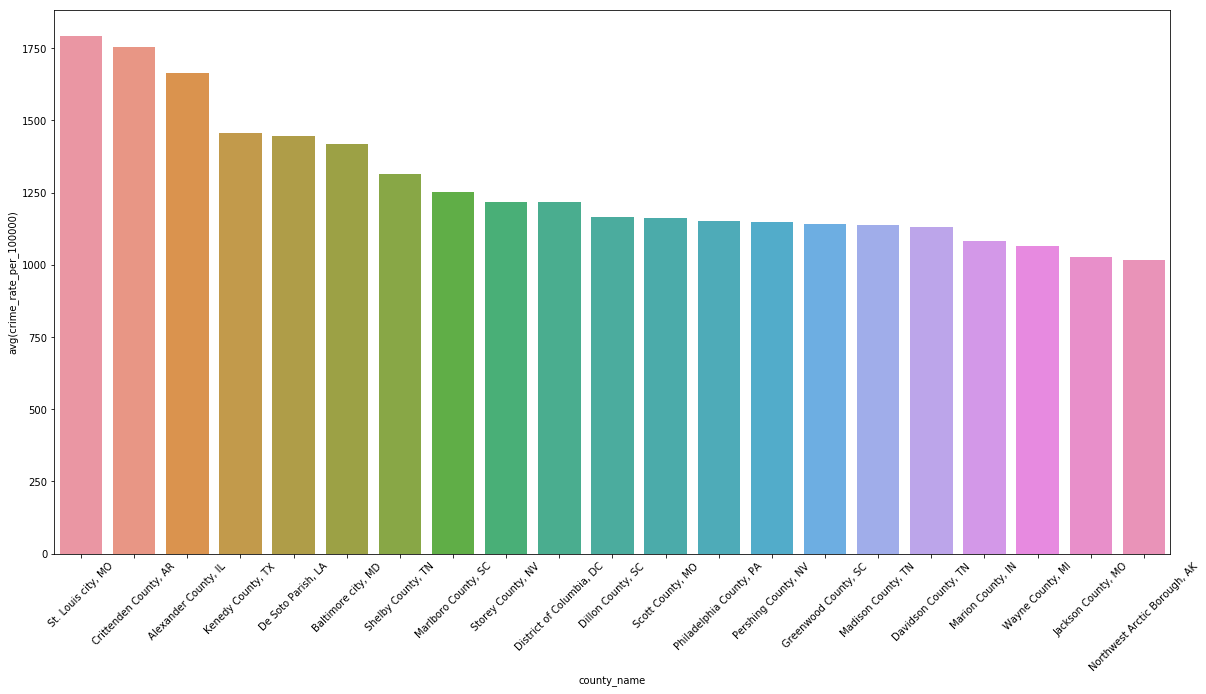

In [177]:
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="county_name", y="avg(crime_rate_per_100000)", data=psubset_crime.loc[:20])
plt.xticks(rotation = 45)